<a href="https://colab.research.google.com/github/2303a51027/AIML-2025/blob/main/AIML_LAB08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install openml

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import openml

# Set the style for seaborn
sns.set(style="whitegrid")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.0 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158699 sha256=26d804631093ec82205ae68acbb4e202a895010ffdde843cadc2a04ebe14fab4
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=e6ed49333ffbe64e4cf6fab6705b9482bd18f598034072a643693b4b867ceaf5
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


In [11]:
# Load the car dataset from OpenML
dataset = openml.datasets.get_dataset(40982)  # The OpenML ID for the car dataset
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# Create a DataFrame
car_data = pd.DataFrame(X)
car_data['BinaryClass'] = y  # Add target variable to the DataFrame

# Describe the features
feature_names = car_data.columns.tolist()
print("Features in the dataset:", feature_names)

# Display dataset info and check for missing values
print(car_data.info())
print("Missing values in the dataset:\n", car_data.isnull().sum())

# Display basic statistics
print(car_data.describe())


<ipython-input-11-cd9a9dd646b6>:2: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(40982)  # The OpenML ID for the car dataset


Features in the dataset: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'BinaryClass']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   V1           1941 non-null   float64 
 1   V2           1941 non-null   float64 
 2   V3           1941 non-null   float64 
 3   V4           1941 non-null   float64 
 4   V5           1941 non-null   float64 
 5   V6           1941 non-null   float64 
 6   V7           1941 non-null   float64 
 7   V8           1941 non-null   float64 
 8   V9           1941 non-null   uint8   
 9   V10          1941 non-null   uint8   
 10  V11          1941 non-null   float64 
 11  V12          1941 non-null   uint8   
 12  V13          1941 non-null   uint8   
 13  V14          1941 non-

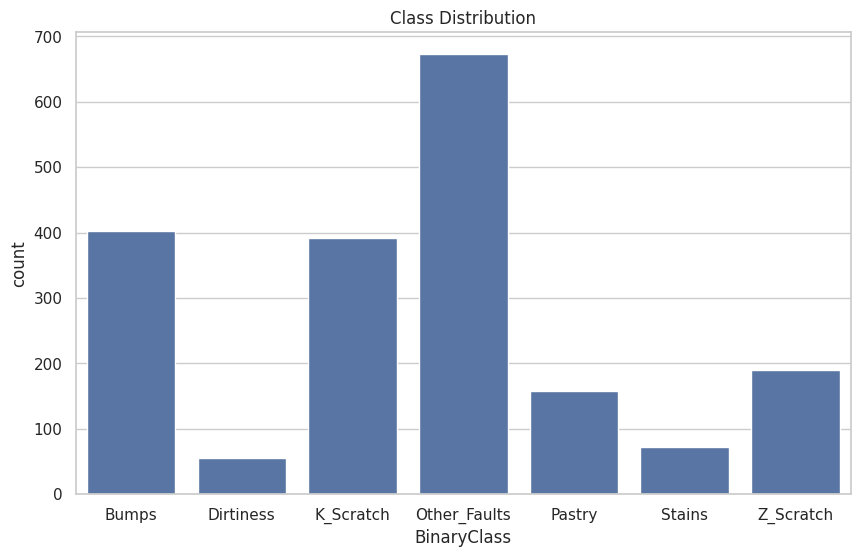

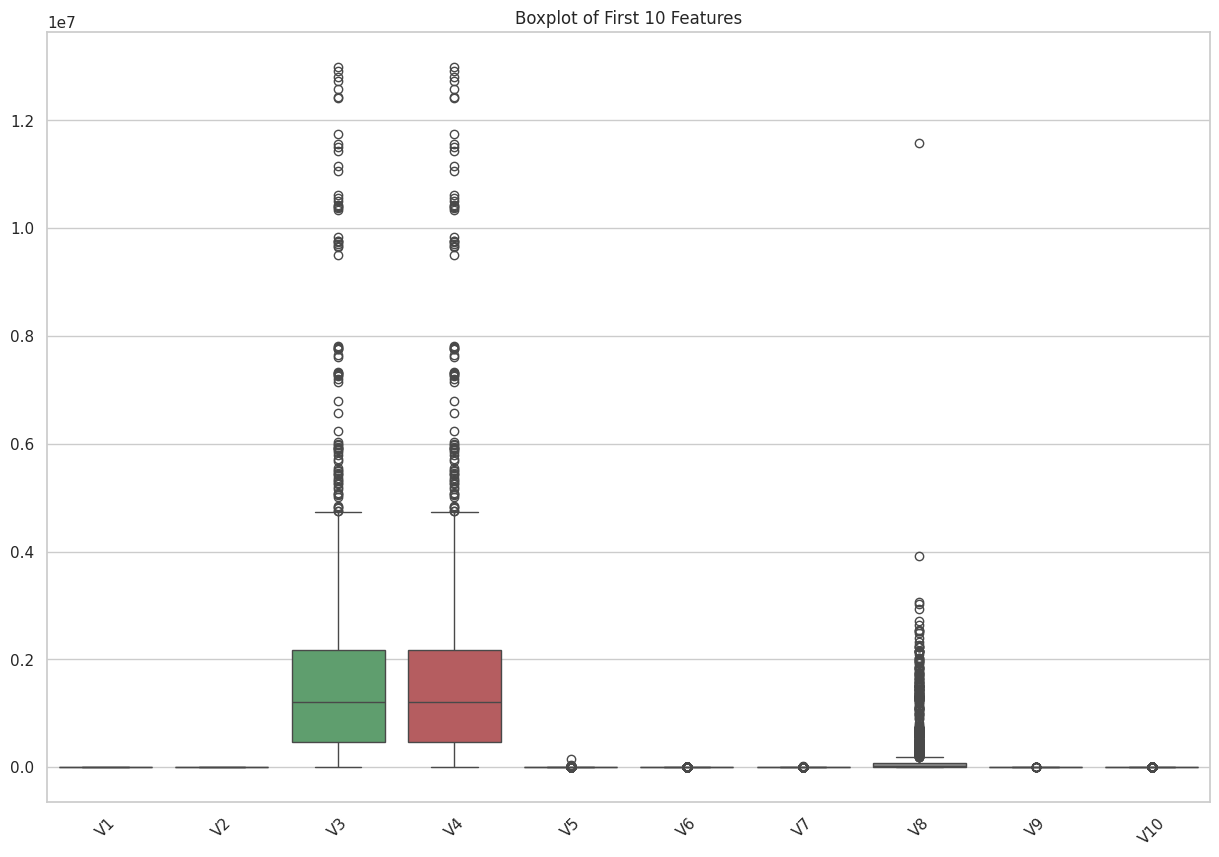

In [12]:
# Exploratory analysis using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='BinaryClass', data=car_data)
plt.title('Class Distribution')
plt.show()

# Boxplot for the first 10 columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=car_data.iloc[:, :10])
plt.xticks(rotation=45)
plt.title('Boxplot of First 10 Features')
plt.show()


In [13]:
# Prepare the data for training
X = car_data.drop('BinaryClass', axis=1)
y = car_data['BinaryClass']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

       Bumps       0.49      0.57      0.53        72
   Dirtiness       0.55      0.75      0.63         8
   K_Scratch       0.92      0.95      0.93        83
Other_Faults       0.76      0.68      0.72       143
      Pastry       0.41      0.41      0.41        29
      Stains       0.92      0.92      0.92        13
   Z_Scratch       0.92      0.88      0.90        41

    accuracy                           0.73       389
   macro avg       0.71      0.74      0.72       389
weighted avg       0.74      0.73      0.73       389

Confusion Matrix:
 [[41  2  1 20  7  0  1]
 [ 1  6  0  1  0  0  0]
 [ 3  0 79  1  0  0  0]
 [29  1  4 97  9  1  2]
 [ 8  1  0  8 12  0  0]
 [ 1  0  0  0  0 12  0]
 [ 0  1  2  1  1  0 36]]


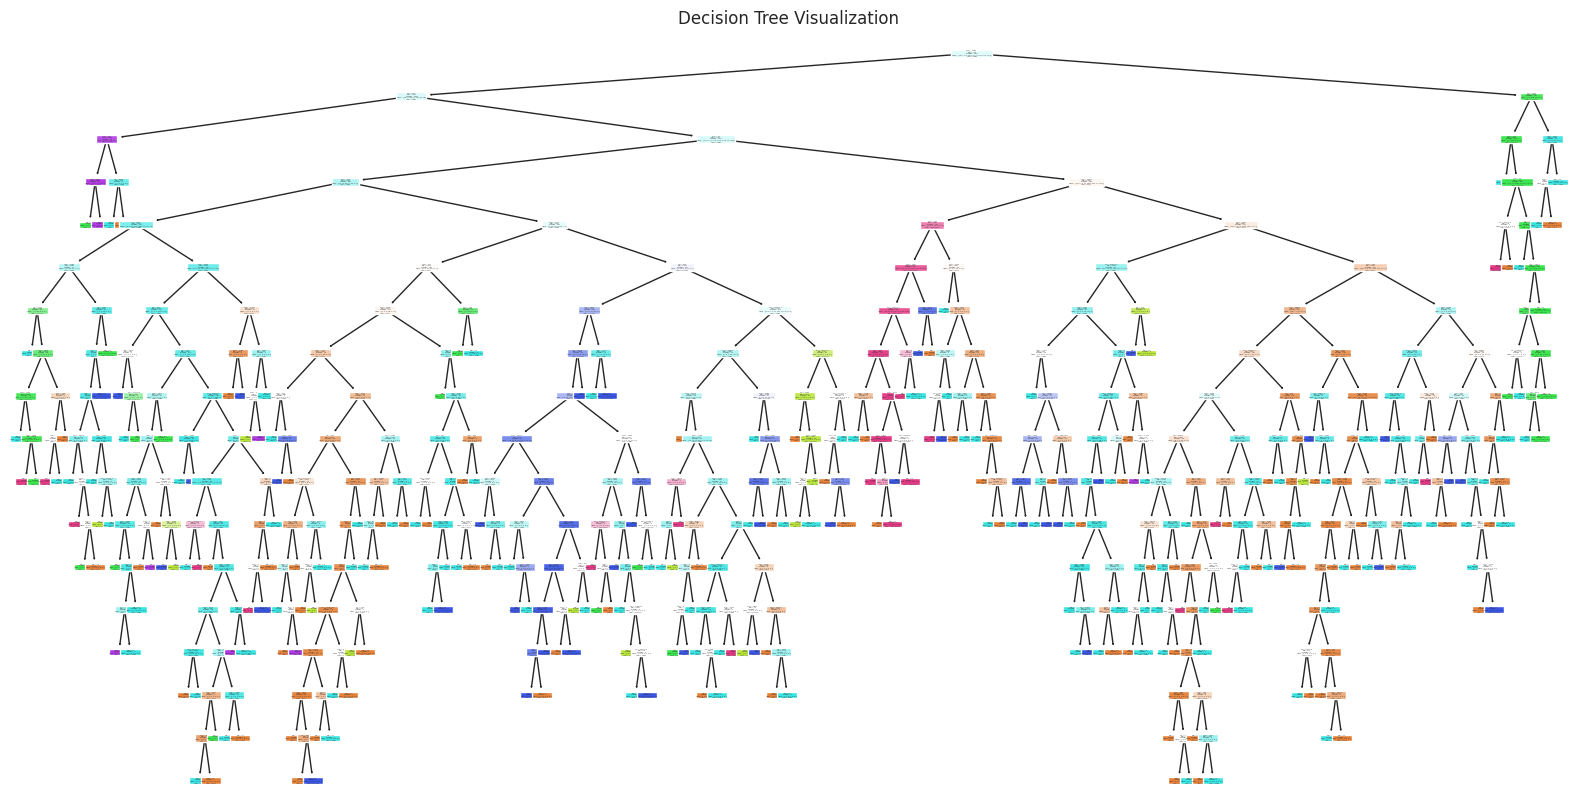

In [18]:
# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20, 10))

# Get the actual class names from the target variable
class_names = car_data['BinaryClass'].unique()

plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=class_names) # Use actual class names
plt.title('Decision Tree Visualization')
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV

# Set the parameters for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_:.2f}')

# Predict using the best estimator
best_dt_classifier = grid_search.best_estimator_
y_pred_best = best_dt_classifier.predict(X_test)

# Evaluate the improved model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Improved Accuracy: {accuracy_best:.2f}')
print('Improved Classification Report:\n', classification_report(y_test, y_pred_best))
print('Improved Confusion Matrix:\n', confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.1s
[C